In [2]:
import numpy as np
a =[ 13.81818182,   6.72727273,   7.33333333,   5.15151515,
         0.24242424,  12.66666667,   6.3030303 ,  52.72727273,
         4.96969697,  61.93939394,   6.24242424,   9.87878788,
        10.90909091,   3.09090909,   4.36363636,   7.09090909,
        18.42424242,   7.57575758,  26.78787879]

print(np.mean(a))

14.0127591705


In [1]:
from __future__ import division, print_function

import pandas as pd
import numpy as np
import tensorflow as tf
from IPython.display import Image, display, clear_output

from tensorflow.python.framework.ops import reset_default_graph

# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
from matplotlib.pyplot import cm
from matplotlib.mlab import PCA as mlabPCA

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

Hej $\phi$

In [2]:
data = pd.read_csv("data_reduced.csv", delimiter=",")

#data = data.reindex(np.random.permutation(data.index))

cancer_type = np.array(data[[0]]) # finding types of cancer
sample_type = np.array(data[[1]]) # finding types of sample
sample_type = sample_type - 1

data.drop(data.columns[[0,1]], axis=1, inplace=True)

num_samples = data.shape[0]
num_features = data.shape[1]

In [3]:
IC50 = pd.read_csv("IC50.csv", delimiter=",",
                   skiprows=range(4),)

new_header = IC50.iloc[0]
IC50 = IC50[1:]
IC50.rename(columns=new_header)

IC50
#new_header

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266
1,NaN,Discretisation \nThreshold (log IC50)/\nCell-L...,1.5671,-3.6395,0.50064,1.9064,-2.0053,-5.6772,3.4712,-0.034145,...,4.6302,2.1291,0.18957,-6.559,2.354,-0.22378,3.5949,-0.30417,-0.76788,-1.8842
2,NaN,A253,S,R,R,R,R,R,R,R,...,S,R,S,R,R,R,R,R,R,R
3,NaN,BB30-HNC,S,R,R,R,R,S,S,R,...,R,S,S,R,S,S,R,NaN,NaN,
4,NaN,BB49-HNC,R,R,R,R,R,R,R,S,...,R,R,R,R,R,S,R,S,S,R
5,NaN,BHY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,S,R,R,R,R,R,R,R,R
6,NaN,BICR10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,R,R,R,R,R,
7,NaN,BICR22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,S,S,R,R,S,R,S,R,R
8,NaN,BICR31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
9,NaN,BICR78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,S,R,R,R,S,R,R,R,R
10,NaN,Ca9-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,S,S,R,R,R,R,R,R,R


In [4]:
data.shape[0] - np.sum(sample_type)

791

In [5]:
data_proj = TSNE(random_state=RS).fit_transform(data)

In [6]:
types = ["BLCA", "BRCA", "COAD/READ", "DLBC", "ESCA", "GBM", "HNSC", "KIRC",
         "LAML", "LGG", "LUAD", "LUSC", "NOT CLAS", "PRAD",          
         "SCLC", "SKCM", "STAD", "THCA", "UCEC"]

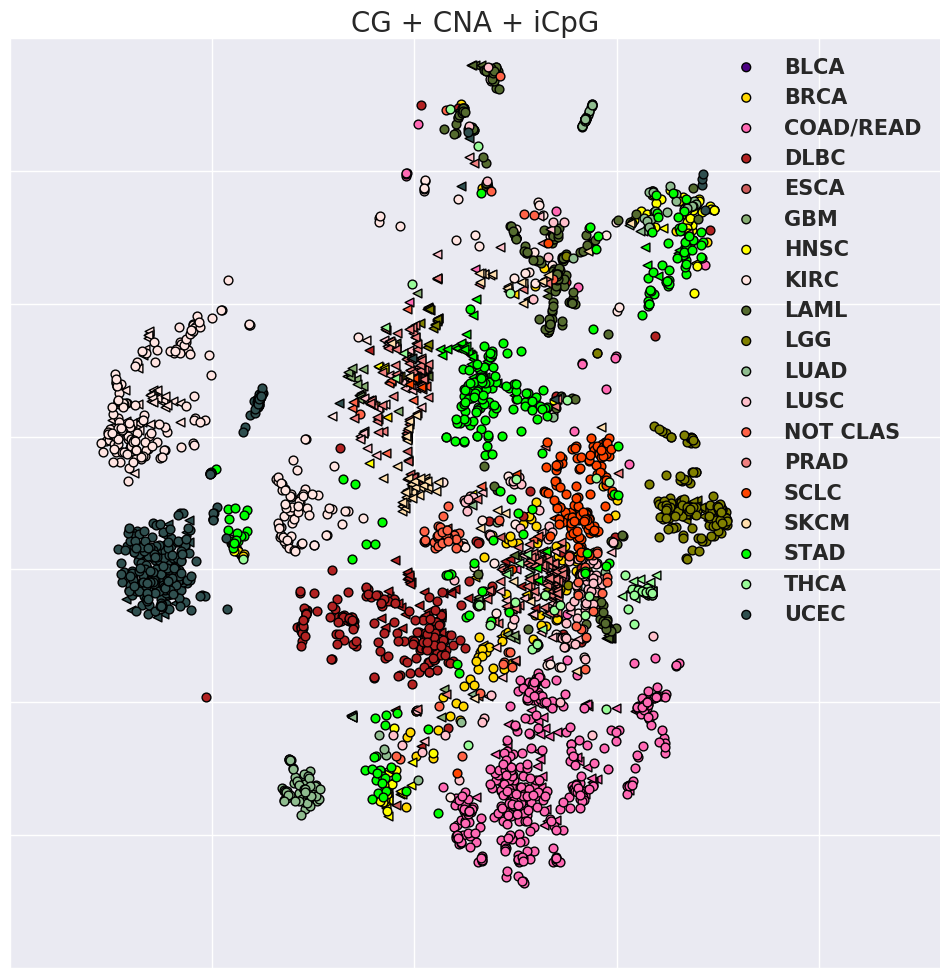

In [76]:
plt.figure(figsize=(12, 12))
colors = matplotlib.colors.cnames.items()
m = ["<", "o"]

for j in range(19):
    plt.scatter(data_proj[np.where((cancer_type==j) & (sample_type==0))[0],0],
                data_proj[np.where((cancer_type==j) & (sample_type==0))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[0])
    plt.scatter(data_proj[np.where((cancer_type==j) & (sample_type==1))[0],0],
                data_proj[np.where((cancer_type==j) & (sample_type==1))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[1],
                label = "%s"%types[j])

plt.title("CG + CNA + iCpG", fontsize=20, fontname="Bold")
legend = plt.legend(loc = 'upper right')
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.ylim([-20,15])    
plt.xlim([-20,26])

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelleft='off')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelleft='off')

plt.show()

In [8]:
# MUTATION
data = np.array(data)
MUT = np.hstack([data[:,:98],
                 data[:,455:549],
                 data[:,666:716],
                 data[:,1024:1250]])



In [9]:
MUT[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [10]:
MUT_proj = TSNE(random_state=RS).fit_transform(MUT)

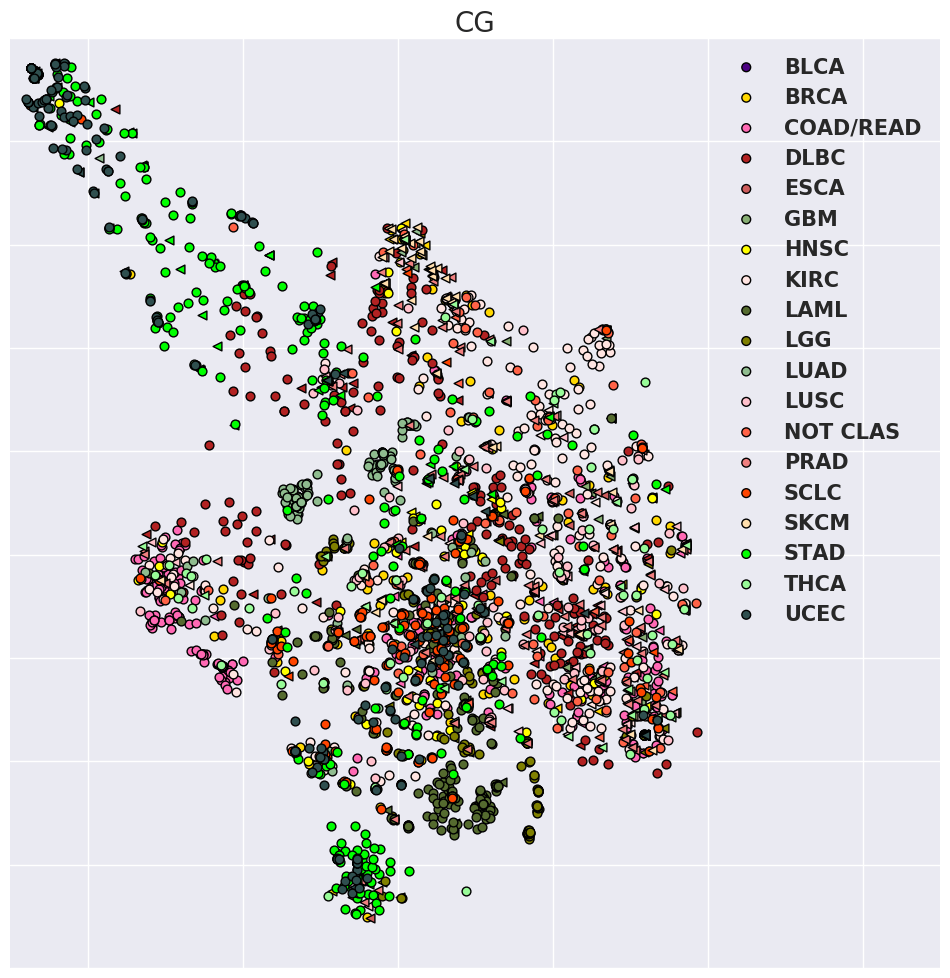

In [72]:
plt.figure(figsize=(12, 12))
colors = matplotlib.colors.cnames.items()
m = ["<", "o"]

for j in range(19):
    plt.scatter(MUT_proj[np.where((cancer_type==j) & (sample_type==0))[0],0],
                MUT_proj[np.where((cancer_type==j) & (sample_type==0))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[0])
    plt.scatter(MUT_proj[np.where((cancer_type==j) & (sample_type==1))[0],0],
                MUT_proj[np.where((cancer_type==j) & (sample_type==1))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[1],
                label = "%s"%types[j])

plt.title("CG", fontsize=20, fontname="Bold")
legend = plt.legend(loc = 'upper right')
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelleft='off')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelleft='off')

plt.ylim([-20,25])    
plt.xlim([-25,35])

plt.show()

In [12]:
# Hypermetabolics
HM = np.vstack(data[:,98:455])

HM 

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
HM_proj = TSNE(random_state=RS).fit_transform(HM)


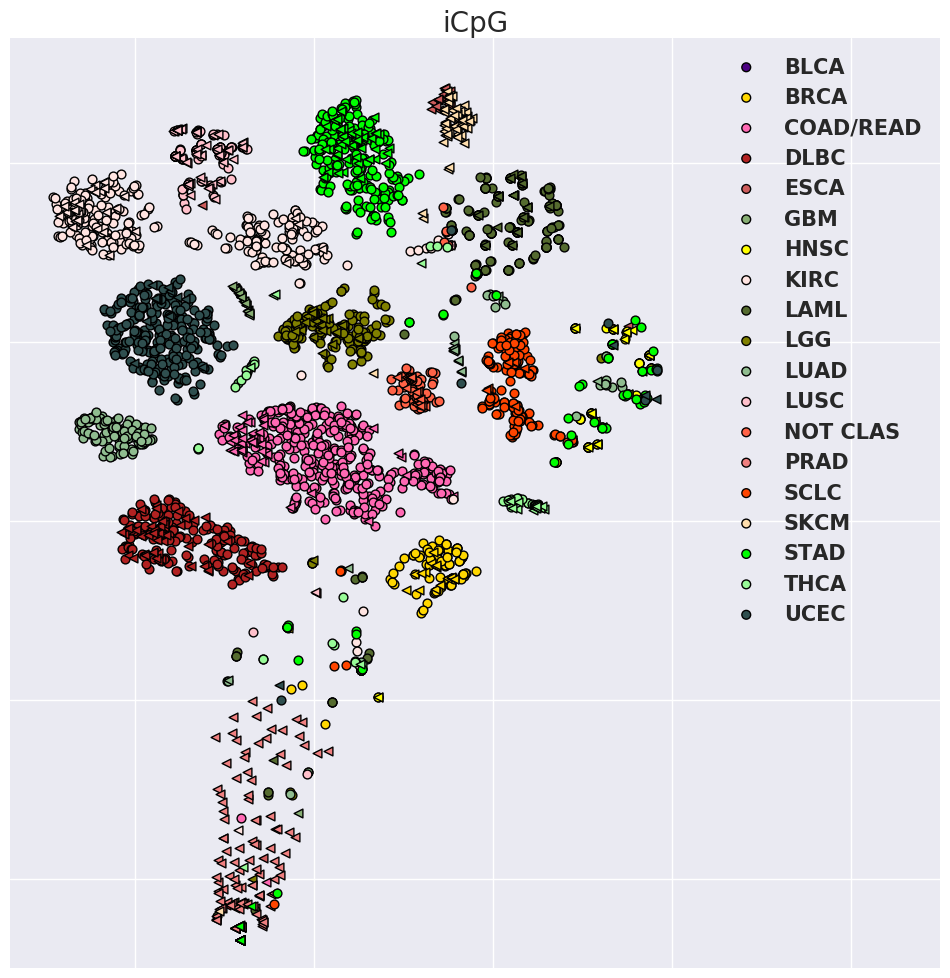

In [77]:
plt.figure(figsize=(12, 12))
colors = matplotlib.colors.cnames.items()
m = ["<", "o"]

for j in range(19):
    
    plt.scatter(HM_proj[np.where((cancer_type==j) & (sample_type==1))[0],0],
            HM_proj[np.where((cancer_type==j) & (sample_type==1))[0],1],
            c=colors[j][0], s=40., lw=1, marker=m[1],
            label = "%s"%types[j])
        
    plt.scatter(HM_proj[np.where((cancer_type==j) & (sample_type==0))[0],0],
                HM_proj[np.where((cancer_type==j) & (sample_type==0))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[0])
    


plt.title("iCpG", fontsize=20, fontname="Bold")
legend = plt.legend(loc = 'upper right')
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelleft='off')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelleft='off')

plt.ylim([-35,17])    
plt.xlim([-17,35])

plt.show()

In [15]:
CNV = np.hstack([data[:,550:665],
                 data[:,717:1023]])

CNV

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
CNV_proj = TSNE(random_state=RS).fit_transform(CNV)


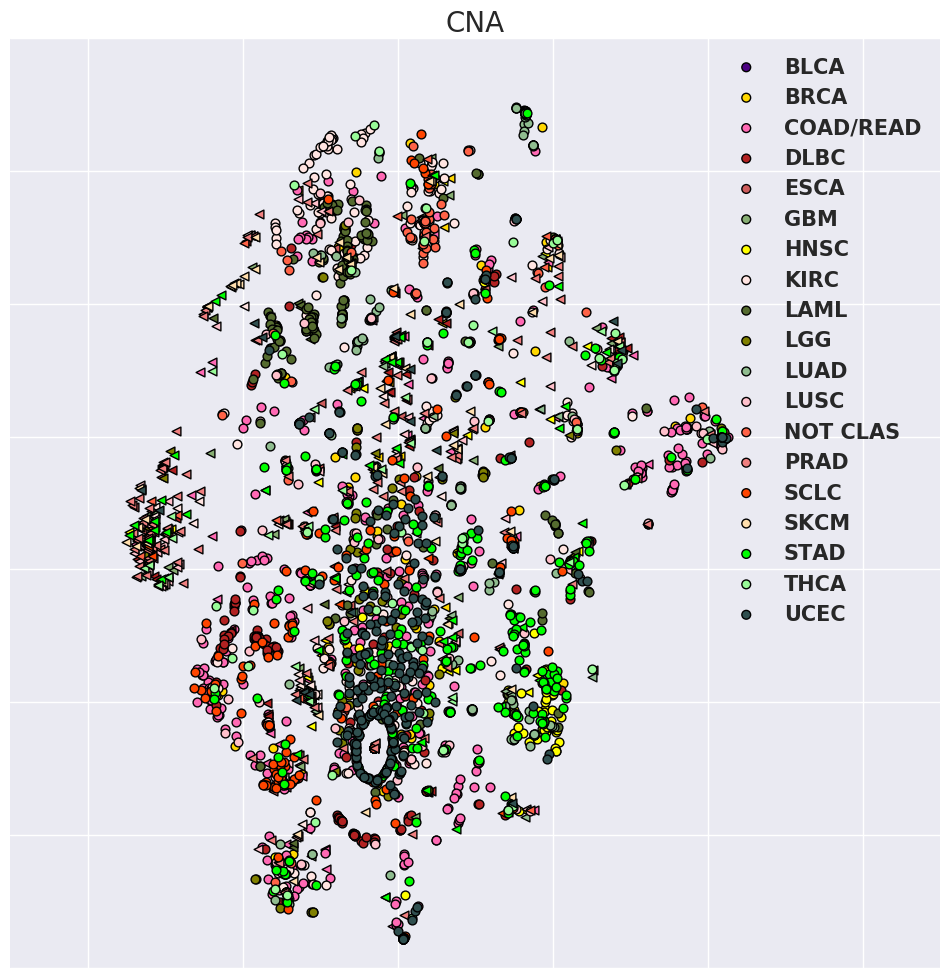

In [74]:
plt.figure(figsize=(12, 12))
colors = matplotlib.colors.cnames.items()
m = ["<", "o"]

for j in range(19):
    plt.scatter(CNV_proj[np.where((cancer_type==j) & (sample_type==0))[0],0],
                CNV_proj[np.where((cancer_type==j) & (sample_type==0))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[0])
    
    plt.scatter(CNV_proj[np.where((cancer_type==j) & (sample_type==1))[0],0],
                CNV_proj[np.where((cancer_type==j) & (sample_type==1))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[1],
                label = "%s"%types[j])

plt.title("CNA", fontsize=20, fontname="Bold")
legend = plt.legend(loc = 'upper right')
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelleft='off')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelleft='off')

plt.ylim([-20,15])    
plt.xlim([-25,35])

plt.show()

In [18]:
MUT_HM = np.hstack([MUT,
                    HM])

MUT_HM_proj = TSNE(random_state=RS).fit_transform(MUT_HM)


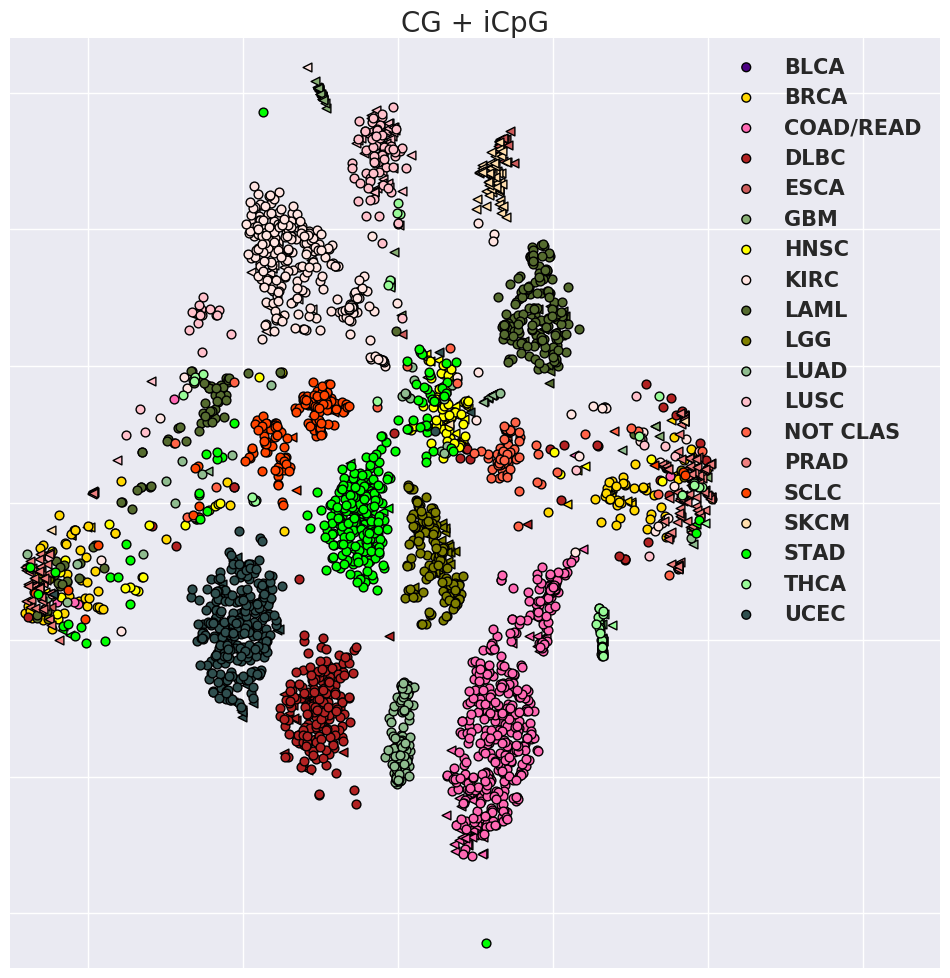

In [75]:


matplotlib.rc('font', **font)


plt.figure(figsize=(12, 12))
colors = matplotlib.colors.cnames.items()
m = ["<", "o"]

for j in range(19):
    plt.scatter(MUT_HM_proj[np.where((cancer_type==j) & (sample_type==0))[0],0],
                MUT_HM_proj[np.where((cancer_type==j) & (sample_type==0))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[0])
    
    plt.scatter(MUT_HM_proj[np.where((cancer_type==j) & (sample_type==1))[0],0],
                MUT_HM_proj[np.where((cancer_type==j) & (sample_type==1))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[1],
                label = "%s"%types[j])

plt.title("CG + iCpG", fontsize=20, fontname="Bold")
legend = plt.legend(loc = 'upper right')
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelleft='off')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelleft='off')

plt.ylim([-17,17])    
plt.xlim([-25,35])

plt.show()

In [20]:
MUT_CNV = np.hstack([MUT,
                    CNV])

MUT_CNV_proj = TSNE(random_state=RS).fit_transform(MUT_CNV)


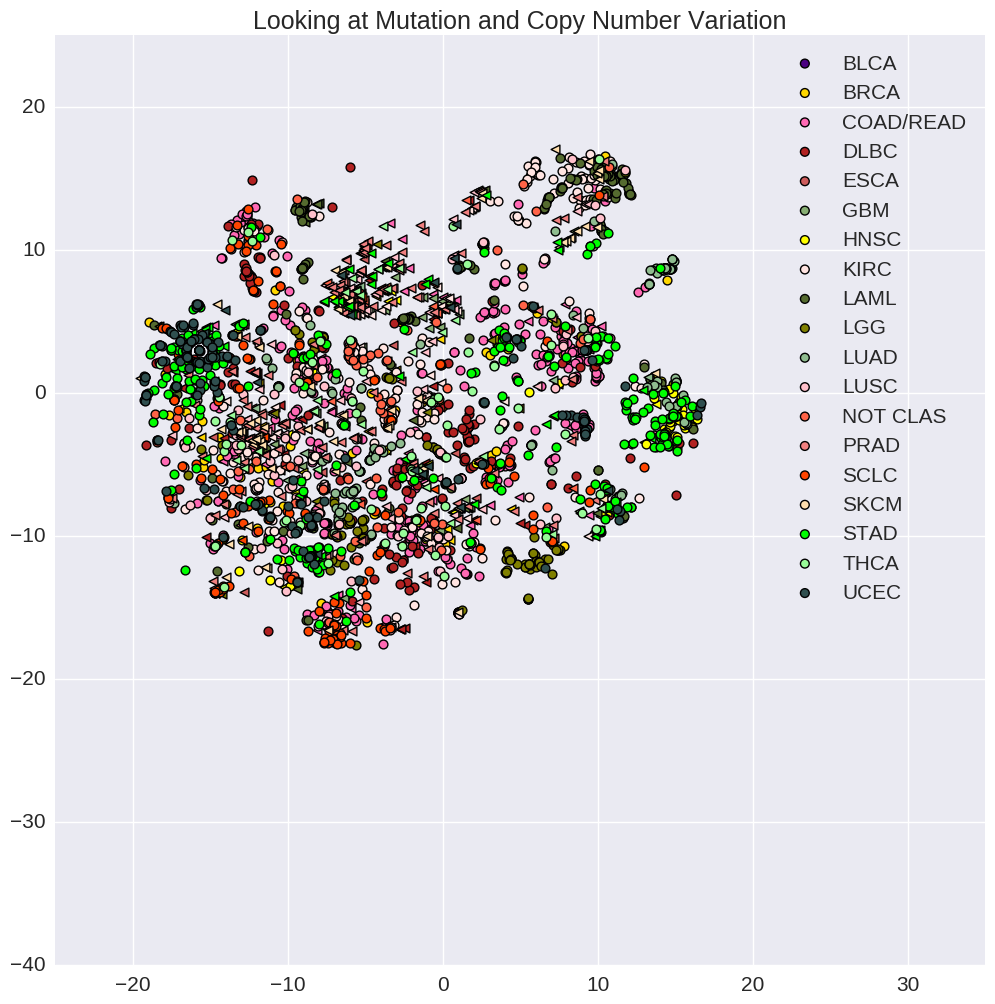

In [21]:
plt.figure(figsize=(12, 12))
colors = matplotlib.colors.cnames.items()
m = ["<", "o"]

for j in range(19):
    plt.scatter(MUT_CNV_proj[np.where((cancer_type==j) & (sample_type==0))[0],0],
                MUT_CNV_proj[np.where((cancer_type==j) & (sample_type==0))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[0])
    
    plt.scatter(MUT_CNV_proj[np.where((cancer_type==j) & (sample_type==1))[0],0],
                MUT_CNV_proj[np.where((cancer_type==j) & (sample_type==1))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[1],
                label = "%s"%types[j])

plt.title("Looking at Mutation and Copy Number Variation")
legend = plt.legend(loc = 'upper right')
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.ylim([-40,25])    
plt.xlim([-25,35])

plt.show()

In [22]:
HM_CNV = np.hstack([HM,
                    CNV])

HM_CNV_proj = TSNE(random_state=RS).fit_transform(HM_CNV)


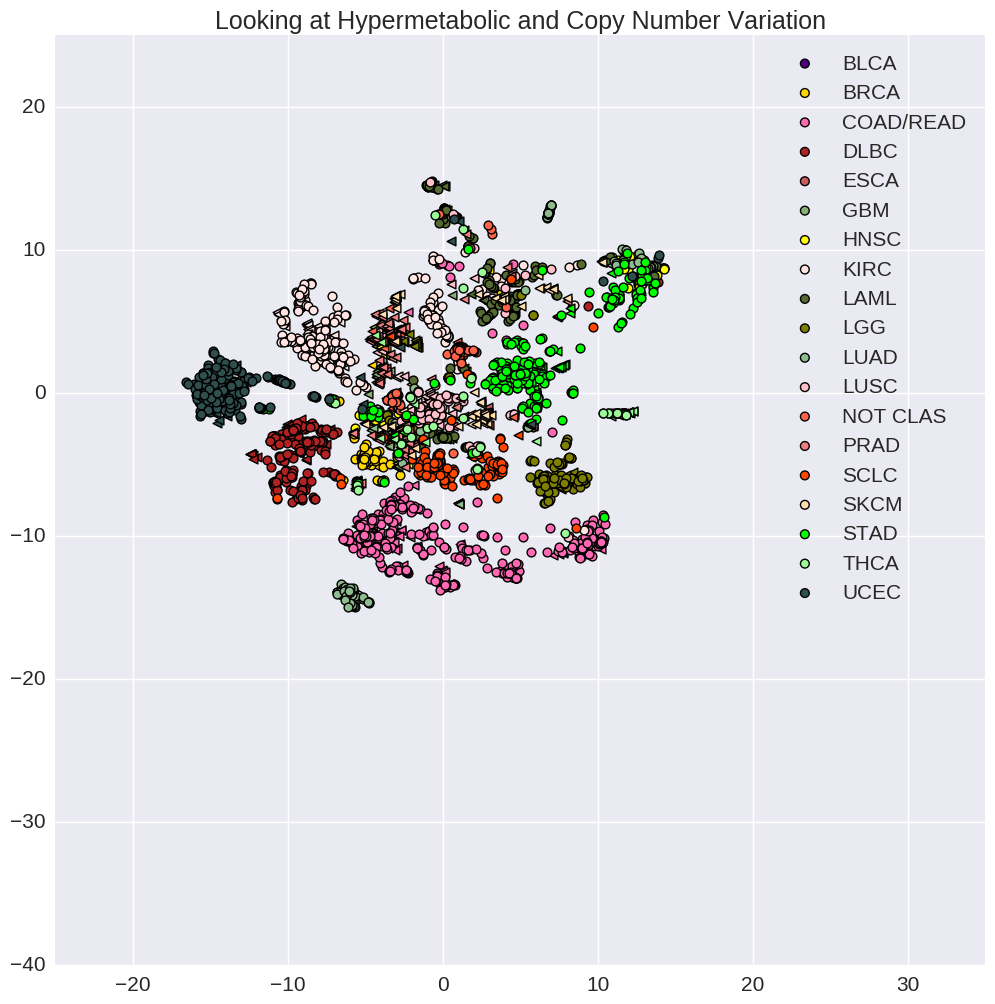

In [23]:
plt.figure(figsize=(12, 12))
colors = matplotlib.colors.cnames.items()
m = ["<", "o"]

for j in range(19):
    plt.scatter(HM_CNV_proj[np.where((cancer_type==j) & (sample_type==0))[0],0],
                HM_CNV_proj[np.where((cancer_type==j) & (sample_type==0))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[0])
    
    plt.scatter(HM_CNV_proj[np.where((cancer_type==j) & (sample_type==1))[0],0],
                HM_CNV_proj[np.where((cancer_type==j) & (sample_type==1))[0],1],
                c=colors[j][0], s=40., lw=1, marker=m[1],
                label = "%s"%types[j])

plt.title("Looking at Hypermetabolic and Copy Number Variation")
legend = plt.legend(loc = 'upper right')
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.ylim([-40,25])    
plt.xlim([-25,35])

plt.show()

In [ ]:
"""

The t-sne indicates that we have low dimentionalities.
Next step would be to use logistic-regression with L1-regiralization.

Possiblie introduce a k-hot encoding for all features.

This will most likely reveal if a change in a feature has an impact on a given cancer-type.

After we can reduce to these features to see if this changes the representation of the unsupervised classification.


"""

# Reducing dimentionality

In [7]:
# MUT [0,1]
# HM [0,1]

# Make them 1-hot vectors

MUT_onehot = np.zeros([MUT.shape[0], MUT.shape[1], len(np.unique(MUT))])
for i in range(MUT.shape[0]):
    MUT_onehot[i][np.arange(MUT.shape[1]), MUT[i]] = 1

MUT_onehot = MUT_onehot.reshape(MUT.shape[0], len(np.unique(MUT))*MUT.shape[1])

HM_onehot = np.zeros([HM.shape[0], HM.shape[1], len(np.unique(HM))])
for i in range(MUT.shape[0]):
    HM_onehot[i][np.arange(HM.shape[1]), HM[i]] = 1

HM_onehot = HM_onehot.reshape(HM.shape[0], len(np.unique(HM))*HM.shape[1])

MUT_HM_onehot = np.concatenate([MUT_onehot, HM_onehot],1)

In [8]:
MUT_HM_onehot.shape

(3463, 1650)

In [9]:
cancer_type.shape

(3463, 1)

In [10]:
np.squeeze(cancer_type).shape

(3463,)

In [11]:
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(penalty="l1")
predicted = cross_validation.cross_val_predict(logreg, MUT_HM_onehot,
                                               np.squeeze(cancer_type),
                                               cv=5)
print(metrics.accuracy_score(cancer_type, predicted))
print(metrics.classification_report(cancer_type, predicted))

/home/tobias/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.976321108865
             precision    recall  f1-score   support

          1       0.99      0.95      0.97       111
          2       1.00      0.99      1.00       469
          3       1.00      0.99      1.00       251
          4       0.88      0.80      0.84        35
          5       1.00      0.97      0.99        35
          6       0.84      0.98      0.90       138
          7       1.00      0.99      0.99       322
          8       0.97      0.96      0.97       269
          9       1.00      0.97      0.99       181
         10       1.00      0.96      0.98       178
         11       1.00      0.98      0.99       161
         12       0.99      0.99      0.99        87
         13       0.84      1.00      0.91       189
         14       1.00      0.97      0.98       162
         15       0.94      0.91      0.92        66
         16       1.00      0.97      0.98       300
         17       1.00      0.93      0.96        86
         18       1.00      0.

In [12]:
from sklearn.linear_model import LogisticRegressionCV
logreg=LogisticRegressionCV(penalty="l1",cv=5,solver='liblinear')
logreg.fit(MUT_HM_onehot,np.squeeze(cancer_type))

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [94]:
for i in range(1):
    tmp = MUT_HM_onehot[i][logreg.coef_[i] != 0]
    
    tmp_onehot = np.zeros([len(tmp), 2])
    tmp_onehot[np.arange(len(tmp)), tmp.astype(int)] = 1
    tmp = np.reshape(tmp_onehot,2*len(tmp))



In [65]:
a = np.ones((3,))
b = np.ones((2,))
d = np.array([1,1,1,1])
c = np.array([a, b])
c


array([array([ 1.,  1.,  1.]), array([ 1.,  1.])], dtype=object)

In [80]:
e = np.append([c,d],0)
e

array([array([array([ 1.,  1.,  1.]), array([ 1.,  1.])], dtype=object),
       array([1, 1, 1, 1]), 0], dtype=object)

In [79]:
e[]

array([array([ 1.,  1.,  1.]), array([ 1.,  1.])], dtype=object)

In [75]:
e[:1]

array([array([array([ 1.,  1.,  1.]), array([ 1.,  1.])], dtype=object)], dtype=object)

In [37]:
tmp_onehot[np.arange(237), tmp]

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
pred = logreg.predict(MUT_HM_onehot)

In [ ]:
sum(pred == np.squeeze(cancer_type))/pred.shape[0]

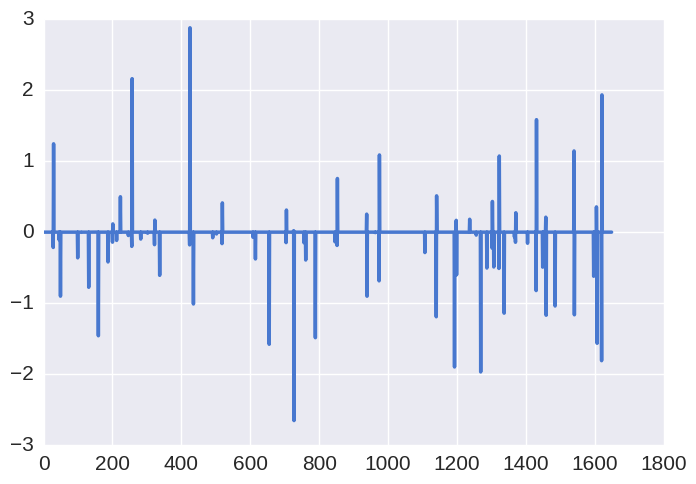

In [31]:
plt.plot(logreg.coef_[3])
plt.show()

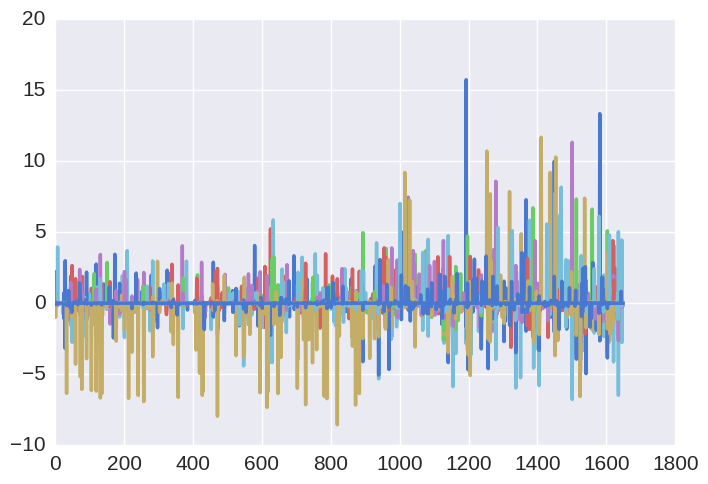

In [24]:
plt.plot(logreg.coef_.T)
plt.show()

In [55]:
z = np.sum(logreg.coef_!=0,1)

In [56]:
100 * (z / MUT_HM_onehot.shape[1])

array([ 13.81818182,   6.72727273,   7.33333333,   5.15151515,
         0.24242424,  12.66666667,   6.3030303 ,  52.72727273,
         4.96969697,  61.93939394,   6.24242424,   9.87878788,
        10.90909091,   3.09090909,   4.36363636,   7.09090909,
        18.42424242,   7.57575758,  26.78787879])

In [51]:
t = []

for i in range(1,20):

    t += [sum(np.squeeze(cancer_type) == i)]

In [52]:
t

[111,
 469,
 251,
 35,
 35,
 138,
 322,
 269,
 181,
 178,
 161,
 87,
 189,
 162,
 66,
 300,
 86,
 295,
 128]

In [12]:
predicted[:100]

array([11, 14, 17,  6, 16,  1,  1,  1, 13,  8, 13, 18, 18, 16, 13, 16, 13,
       13,  4, 16, 13,  4, 13, 13,  8, 11, 13,  8, 11,  8, 17,  6, 19, 18,
        2, 13,  7,  7,  8,  4, 15, 18,  6, 13,  1,  8, 18,  7,  7,  7,  7,
        7, 13,  2,  2,  2,  2,  3, 16, 13,  7,  8,  2, 13,  2,  7,  1,  7,
        2,  8, 18, 13,  2, 11, 11,  2,  3,  6,  6,  3, 18, 13, 16, 13, 13,
       13,  3, 13,  3, 13,  3,  3, 15,  3, 16,  5, 19, 13, 16, 16])

In [14]:
np.squeeze(cancer_type[:100])

array([11, 14, 17,  6, 16,  1,  1,  1, 13,  8,  6, 18, 18, 16, 13, 16, 13,
       13,  4, 16, 13,  4, 13, 13,  8, 11, 13,  8, 11,  8, 17,  6, 19, 18,
        2, 13,  7,  7,  8,  4,  4, 18,  6, 13,  1,  8, 18,  7,  7,  7,  7,
        7, 13,  2,  2,  2,  2,  3, 16, 13,  7,  8,  2, 13,  2,  7,  1,  7,
        2,  8, 18, 13,  2, 11, 11,  2,  3,  6,  6,  3, 18, 13, 16, 13, 13,
       13,  3,  3,  3,  9,  3,  3, 15,  3, 16,  5, 19, 16, 16, 16])

In [21]:
logreg.__dict__

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
cross_validation.

In [142]:
clf = sklearn.linear_model.LogisticRegressionCV(Cs=10, fit_intercept=True, cv=5, dual=False,
                                                penalty='l1', scoring=None, solver='liblinear',
                                                tol=0.0001, max_iter=100, class_weight=None,
                                                n_jobs=1, verbose=0, refit=True, intercept_scaling=1.0,
                                                multi_class='ovr', random_state=None)

In [143]:
clf.fit(MUT_HM_onehot, cancer_type)

/home/tobias/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [150]:
np.sum(clf.coef_,0).shape

(1650,)

In [153]:
sum(MUT_HM_weights == 0)

179

In [154]:
MUT_HM_weights = clf.coef_


In [157]:
z = []

for i in range(19):
    z += [sum(MUT_HM_weights[i]==0)]
    
    

In [159]:
d

[1282,
 1564,
 1571,
 1564,
 1646,
 1432,
 1535,
 766,
 1575,
 660,
 1546,
 1503,
 1482,
 699,
 1591,
 1511,
 1320,
 555,
 1433]

In [82]:
MUT[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [83]:
MUT_onehot[1]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1